In [134]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
city_csvpath = os.path.join('raw_data', 'city_data.csv')
ride_csvpath = os.path.join('raw_data', 'ride_data.csv')
city_data = pd.read_csv(city_csvpath)
ride_data = pd.read_csv(ride_csvpath)
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [136]:
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [137]:
len(ride_data)

2375

In [138]:
len(city_data)

126

In [139]:
ride_data_group = ride_data.groupby('city')
ride_data_fare_totals = ride_data_group[['fare']].sum().rename(columns={'fare':'Total Fares'}).reset_index()
ride_data_fare_totals.head()

,city,Total Fares
0,Alvarezhaven,741.79
1,Alyssaberg,535.85
2,Anitamouth,335.84
3,Antoniomouth,519.75
4,Aprilchester,417.65


In [140]:
ride_data_rider_totals = ride_data_group[['city']].count().rename(columns={'city':'Total Rides'}).reset_index()
ride_data_rider_totals.head()


,city,Total Rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [141]:
merge_table_ave = pd.merge(ride_data_rider_totals, ride_data_fare_totals, on='city')
merge_table_ave.head()

,city,Total Rides,Total Fares
0,Alvarezhaven,31,741.79
1,Alyssaberg,26,535.85
2,Anitamouth,9,335.84
3,Antoniomouth,22,519.75
4,Aprilchester,19,417.65


In [142]:
len(merge_table_ave)

125

In [143]:
merge_table_ave['Average Fare'] = merge_table_ave['Total Fares']/merge_table_ave['Total Rides']

In [144]:
merge_table_ave.head()

,city,Total Rides,Total Fares,Average Fare
0,Alvarezhaven,31,741.79,23.928710
1,Alyssaberg,26,535.85,20.609615
2,Anitamouth,9,335.84,37.315556
3,Antoniomouth,22,519.75,23.625000
4,Aprilchester,19,417.65,21.981579


In [181]:
merge_table_complete = pd.merge(merge_table_ave, city_data, on='city').rename(columns={'driver_count':'Total Drivers', 
                                                                                       'type':'Type', 'city': 'City'})

In [182]:
merge_table_complete = merge_table_complete[['Type', 'City', 'Total Drivers', 'Total Rides', 'Total Fares', 'Average Fare']]
#merge_table_complete2 = merge_table_complete.sort_values(['Type']).reset_index(drop=True)
#mmm = merge_table_complete.groupby(['Type', 'City'])


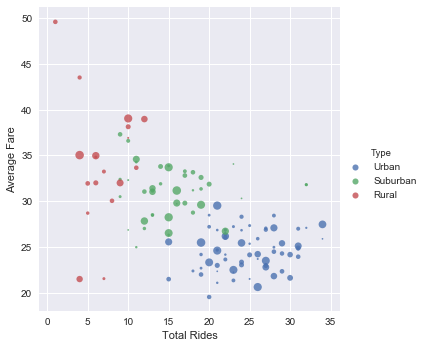

In [183]:
sns.lmplot(x='Total Rides', y = 'Average Fare', data = merge_table_complete, fit_reg=False, hue='Type', scatter_kws={"s": merge_table_complete['Total Drivers']})
plt.show()

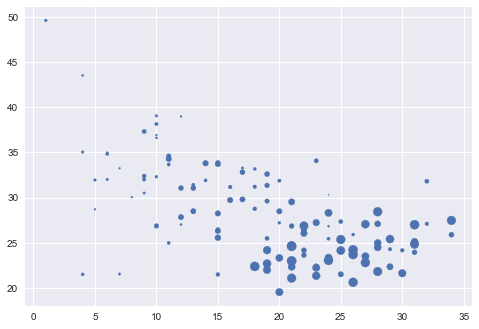

In [163]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(merge_table_complete['Total Rides'], merge_table_complete['Average Fare'], 
               s=merge_table_complete['Total Drivers']*1.2)
        
plt.show()

In [189]:
city_type = merge_table_complete.groupby('Type')
city_type_drivers_df = pd.DataFrame(city_type['Total Drivers'].sum())
#city_type_drivers_df

In [190]:
city_type_fares = merge_table_complete.groupby('Total Fares')
city_type_fares_df = pd.DataFrame(city_type['Total Fares'].sum())
#city_type_fares_df

In [191]:
city_type_rides = merge_table_complete.groupby('Total Rides')
city_type_rides_df = pd.DataFrame(city_type['Total Rides'].sum())
#city_type_rides_df

### Total Rides - Pie Chart

In [214]:
labels = city_type_rides_df.reset_index()
labels_series = ride_labels['Type']
#labels_series

In [282]:
explode = []
for x in range(len(labels_series)):
    if x == 2:
        explode.append(.07)
    else:
        explode.append(0)

In [283]:
total_ride_sizes = city_type_rides_df['Total Rides']
#total_ride_sizes

In [284]:
colors = ["yellowgreen", "red", "lightcoral"]
plt.pie(total_ride_sizes, labels=labels_series, colors=colors, autopct="{0:1.1f}%".format, explode=explode, shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x2138307f9e8>,
  <matplotlib.text.Text at 0x2138309feb8>])

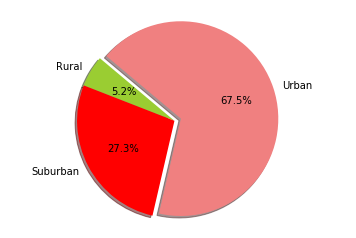

In [285]:
plt.axis("equal")
plt.show()

In [286]:
total_driver_sizes = city_type_drivers_df['Total Drivers']
#total_driver_sizes

In [287]:
colors = ["yellowgreen", "red", "lightcoral"]
plt.pie(total_driver_sizes, labels=labels_series, colors=colors, autopct="{0:1.1f}%".format, explode=explode, shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x21383117cc0>,
  <matplotlib.text.Text at 0x213831431d0>])

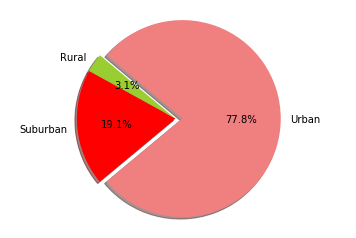

In [288]:
plt.axis("equal")
plt.show()

In [289]:
total_fare_sizes = city_type_fares_df['Total Fares']

In [290]:
colors = ["yellowgreen", "red", "lightcoral"]
plt.pie(total_fare_sizes, labels=labels_series, colors=colors, autopct="{0:1.1f}%".format, explode=explode, shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x213831ad128>,
  <matplotlib.text.Text at 0x213831cf5f8>])

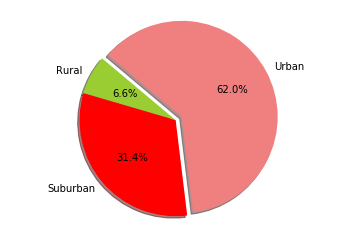

In [291]:
plt.axis("equal")
plt.show()